In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import subprocess
import os
from collections import defaultdict
from datetime import datetime as dt
from collections import Counter

In [2]:
DATA_DIR = "performance"
DATASETS = [x for x in os.listdir(DATA_DIR) if x.startswith("test")]
print(len(DATASETS))
print(DATASETS[:10])

300
['test_5900_4425_100000000', 'test_9100_4550_100000000', 'test_600_150_100000000', 'test_1700_850_100000000', 'test_4700_2350_100000000', 'test_3000_2250_100000000', 'test_4800_3600_100000000', 'test_7300_5475_100000000', 'test_8800_6600_100000000', 'test_3000_1500_100000000']


In [5]:
arr_sizes = []
ans_fracts = []
max_vals = []
answers = []
found = []
runtimes = []
densities = []
failed_cmds = []


datasets_num = len(DATASETS)
for num, dataset in enumerate(DATASETS):
    dt_0 = dt.now()
    dataset_path = os.path.join(DATA_DIR, dataset)
    dataset_info = dataset.split("_")
    arr_size = int(dataset_info[1])
    ans_fract = int(dataset_info[2])
    max_val = int(dataset_info[3])
    dataset_files = os.listdir(dataset_path)
    for dfile in dataset_files:
        dfile_path = os.path.join(dataset_path, dfile)
        with open(dfile_path, "r") as f:
            answer = int(f.readlines()[0].split()[-1])
        # TODO: smarter output parsing
        cmd = f"./SSP.py {dfile_path} {answer} -d --gd"
        t_0 = dt.now()
        try:
            cmd_out = subprocess.check_output(cmd, shell=True).decode("utf-8").split("\n")
            runtime = dt.now() - t_0
            res = False if "None" in cmd_out[-1] else True
            density = float(cmd_out[1].split()[-1])
            arr_sizes.append(arr_size)
            ans_fracts.append(ans_fract)
            max_vals.append(max_val)
            answers.append(answer)
            found.append(res)
            runtimes.append(runtime)
            densities.append(density)
        except subprocess.CalledProcessError:
            failed_cmds.append(cmd)
    print(f"Dataset {num + 1} / {datasets_num} done in {dt.now() - dt_0}")

Dataset 0 / 300 done in 0:00:01.561889
Dataset 1 / 300 done in 0:00:01.507829
Dataset 2 / 300 done in 0:00:01.388802
Dataset 3 / 300 done in 0:00:02.693592
Dataset 4 / 300 done in 0:00:01.421863
Dataset 5 / 300 done in 0:00:01.558058
Dataset 6 / 300 done in 0:05:12.024956
Dataset 7 / 300 done in 0:00:01.450040
Dataset 8 / 300 done in 0:00:01.435875
Dataset 9 / 300 done in 0:00:01.257029
Dataset 10 / 300 done in 0:00:01.446653
Dataset 11 / 300 done in 0:00:01.298033
Dataset 12 / 300 done in 0:00:01.400538
Dataset 13 / 300 done in 0:00:01.496198
Dataset 14 / 300 done in 0:00:01.355657
Dataset 15 / 300 done in 0:00:03.115701
Dataset 16 / 300 done in 0:00:01.377257
Dataset 17 / 300 done in 0:00:01.463574
Dataset 18 / 300 done in 0:00:01.527760
Dataset 19 / 300 done in 0:00:01.498125
Dataset 20 / 300 done in 0:00:01.448550
Dataset 21 / 300 done in 0:00:01.550306
Dataset 22 / 300 done in 0:00:01.426380
Dataset 23 / 300 done in 0:00:01.448145
Dataset 24 / 300 done in 0:00:01.486212
Dataset 25

In [6]:
runtimes_sec = []
for rt in runtimes:
    rt_data = str(rt).split(":")
    s = float(rt_data[2])
    m = int(rt_data[1])
    h = int(rt_data[0])
    tottime = h * 60 * 60 + m * 60 + s
    runtimes_sec.append(tottime)

In [7]:
print("\n".join(failed_cmds))

./SSP.py performance/test_4800_3600_100000000/17.txt 104022295 -d --gd
./SSP.py performance/test_4500_2250_100000000/2.txt 64324918 -d --gd
./SSP.py performance/test_3300_2475_100000000/0.txt 72499744 -d --gd
./SSP.py performance/test_9600_2400_100000000/0.txt 69286237 -d --gd
./SSP.py performance/test_4900_1225_100000000/13.txt 34649334 -d --gd
./SSP.py performance/test_8200_6150_100000000/6.txt 176911219 -d --gd
./SSP.py performance/test_8900_6675_100000000/10.txt 192391830 -d --gd
./SSP.py performance/test_6000_4500_100000000/9.txt 129702823 -d --gd


In [8]:
f = open("results.tsv", "w")
f.write("arr_size\tans_fract\tmaxval\tanswer\tfound\truntime\tdensity\n")
for elem in zip(arr_sizes, ans_fracts, max_vals, answers, found, runtimes, densities):
    f.write("\t".join([str(x) for x in elem]))
    f.write("\n")
f.close()

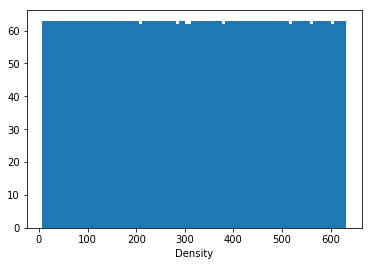

Min density: 6.323878828794566; max: 632.3808683729275


In [9]:
plt.hist(densities, bins=100)
plt.xlabel("Density")
plt.show()

print(f"Min density: {min(densities)}; max: {max(densities)}")

In [10]:
print(Counter(found))

Counter({True: 6292})


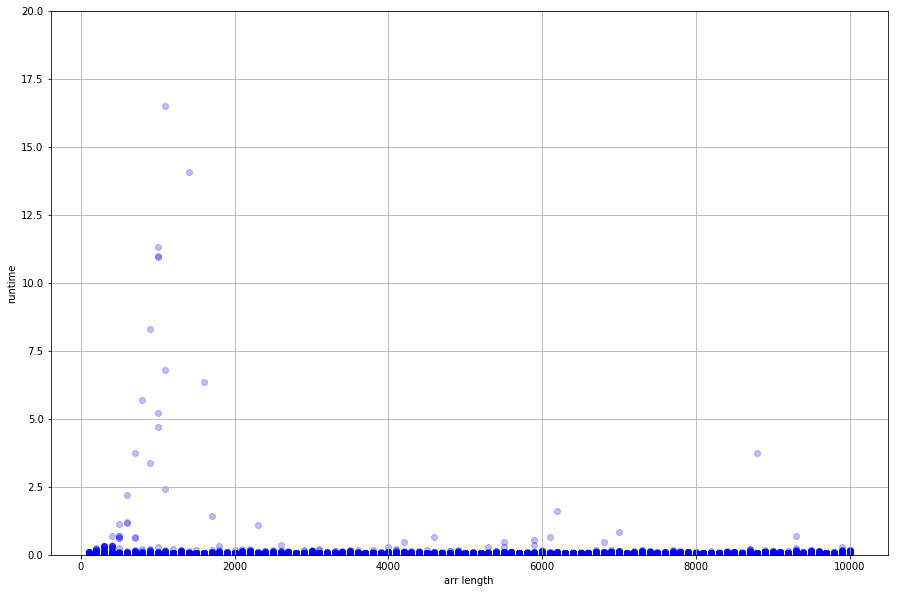

In [20]:
fig = plt.figure(figsize=(15, 10))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.scatter(arr_sizes, runtimes_sec, color='blue', alpha=0.25)
ax_1.set_xlabel("arr length")
ax_1.set_ylabel('runtime')
ax_1.set_ylim(0, 20)
ax_1.grid()
plt.show()

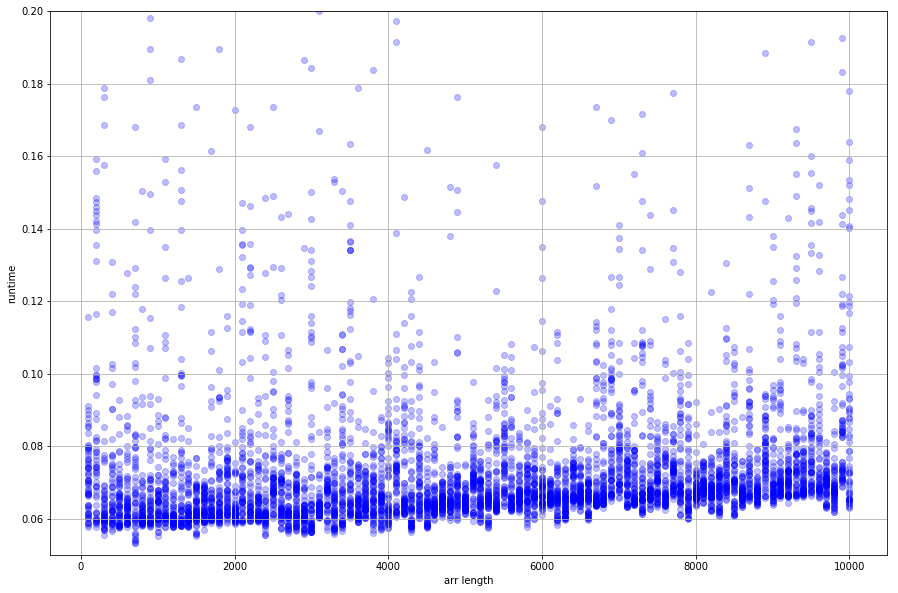

In [16]:
fig = plt.figure(figsize=(15, 10))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.scatter(arr_sizes, runtimes_sec, color='blue', alpha=0.25)
ax_1.set_xlabel("arr length")
ax_1.set_ylabel('runtime')
ax_1.set_ylim(0.05, 0.2)
ax_1.grid()

plt.show()